In [1]:
import subprocess
import time
import os
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'D:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [2]:
with open('D:/dev/arknights_material_icon/derived/name2idx.json') as f:
    name2idx = json.load(f)
with open('D:/dev/arknights_material_icon/derived/idx2name.json') as f:
    idx2name = json.load(f)
NUM_CLASS = len(idx2name)

In [3]:
# Icon classification
def convbr(in_c, out_c, kernel_size, stride):
    return nn.Sequential(nn.Conv2d(in_c, out_c, kernel_size, stride, kernel_size//2, bias=False), nn.BatchNorm2d(out_c), nn.ReLU())
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            convbr(3, 16, 3, 1),
            convbr(16, 32, 3, 2),    # 64
            convbr(32, 32, 3, 1),
            convbr(32, 64, 3, 2),   # 32
            convbr(64, 64, 3, 1),
            convbr(64, 128, 3, 2),   # 16
            convbr(128, 128, 3, 1),
            convbr(128, 256, 3, 2),  # 8
            convbr(256, 256, 3, 1),
            nn.Conv2d(256, NUM_CLASS, 3, 1, 1, bias=False)
        )
    def forward(self, x):
        out = self.model(x)
        out = out.mean((2, 3))
        return out
model = Model()
model.load_state_dict(torch.load('D:/dev/arknights_material_icon/derived/model.bin'))
model.cuda()
model.eval()

Model(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (4): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stri

In [4]:
# Not used
class DigitModel(nn.Module):
    def __init__(self):
        super(DigitModel, self).__init__()
        self.model = nn.Sequential(
            convbr(1, 8, 3, 1),
            convbr(8, 16, 3, 2),    # 14
            convbr(16, 32, 3, 1),
            convbr(32, 64, 3, 2),   # 7
            nn.Conv2d(64, 10, 3, 1, 1, bias=False)
        )
    def forward(self, x):
        out = self.model(x)
        out = out.mean((2, 3))
        return out
digit_model = DigitModel()
digit_model.load_state_dict(torch.load('D:/dev/arknights_material_icon/derived/digit_model.bin'))
digit_model.cuda()
digit_model.eval()

DigitModel(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (4): Conv2d(64, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1

(676, 1201, 3)


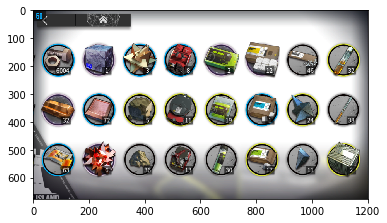

In [5]:
# pipe = subprocess.Popen("adb shell screencap -p",
#                        stdin=subprocess.PIPE,
#                        stdout=subprocess.PIPE, shell=True)
# image_bytes = pipe.stdout.read().replace(b'\r\r\n', b'\n')
# image_bytes = np.frombuffer(image_bytes, np.uint8)
# scene = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
scene = cv2.imread('ark_scene.png')
plt.imshow(scene[..., ::-1])
print(scene.shape)
wh_ratio = scene.shape[1] / scene.shape[0]
scene = cv2.resize(scene, (int(720*wh_ratio), 720))

In [6]:
circles = cv2.HoughCircles(cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY), cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=30, minRadius=55, maxRadius=65)
print(circles[0])

[[ 873.5  379.5   63.2]
 [ 251.5  379.5   63.3]
 [1029.5  379.5   58.9]
 [ 407.5  570.5   64.4]
 [ 406.5  190.5   63.3]
 [ 407.5  380.5   58.8]
 [1184.5  189.5   58.9]
 [ 874.5  569.5   58.9]
 [ 563.5  570.5   64.4]
 [  95.5  380.5   58.9]
 [ 718.5  380.5   58.8]
 [1184.5  568.5   63.3]
 [1028.5  569.5   58.9]
 [ 251.5  568.5   63.3]
 [  95.5  189.5   63.3]
 [ 251.5  189.5   58.9]
 [ 717.5  190.5   58.9]
 [1185.5  380.5   63.3]
 [  98.5  570.5   61.1]
 [1025.5  193.5   58.9]
 [ 563.5  190.5   63.3]
 [ 561.5  379.5   63.3]
 [ 719.5  567.5   61.1]
 [ 872.5  191.5   63.3]]


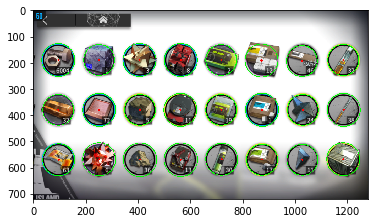

In [7]:
circles_int = np.uint16(np.around(circles))
scene_circle = scene.copy()
for i in circles_int[0,:]:
    # draw the outer circle
    cv2.circle(scene_circle,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(scene_circle,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(scene_circle[..., ::-1])

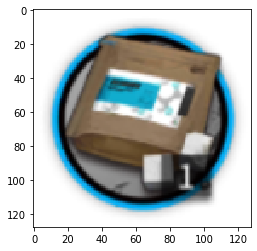

0.999632716178894 49 Tang_Zu


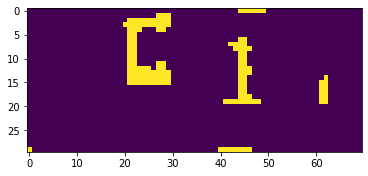

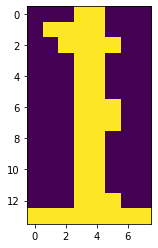

1


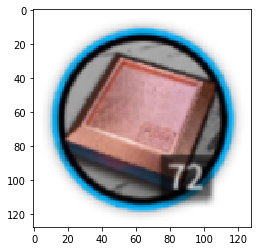

0.9814767241477966 65 Yan_Mo_Shi


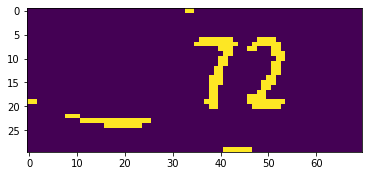

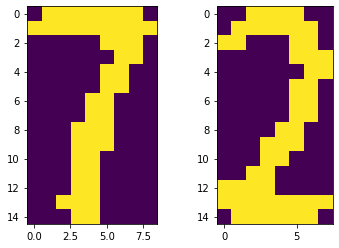

72


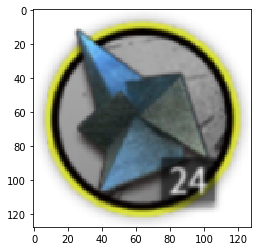

0.9987863898277283 69 Yi_Tie


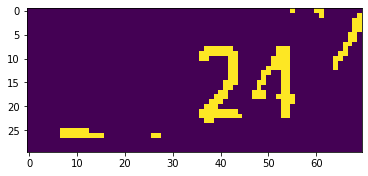

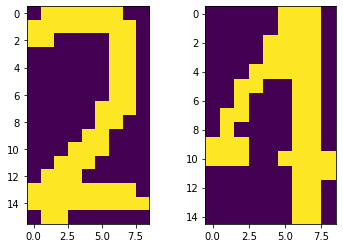

24


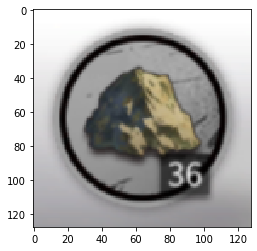

0.9998983144760132 73 Yuan_Yan


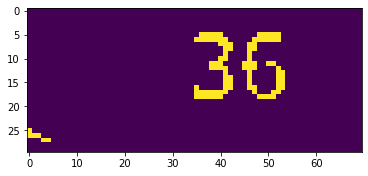

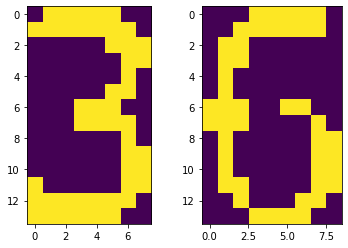

36


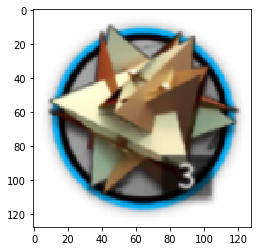

0.8873211145401001 37 RMA70-12


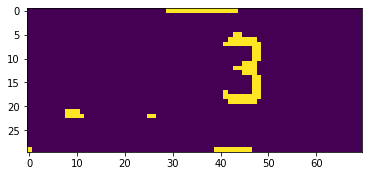

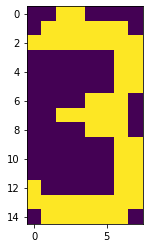

3


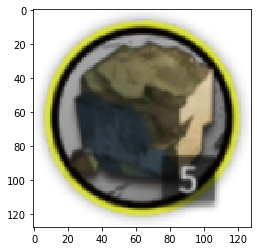

0.9994483590126038 13 Gu_Yuan_Yan


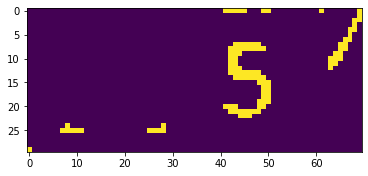

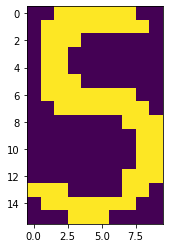

5


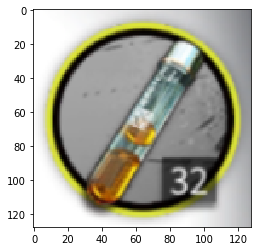

0.9998447895050049 56 Tong_Ning_Ji


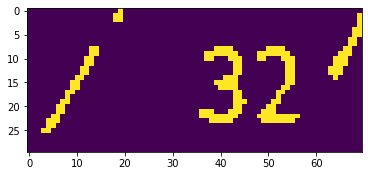

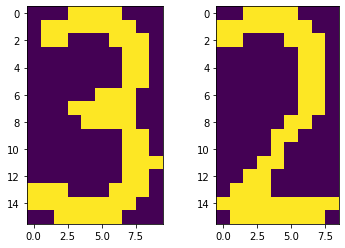

32


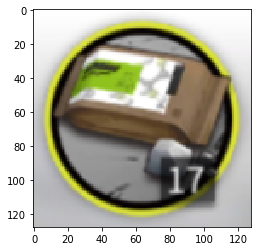

0.9999382495880127 47 Tang


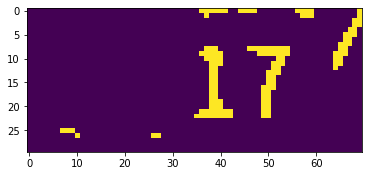

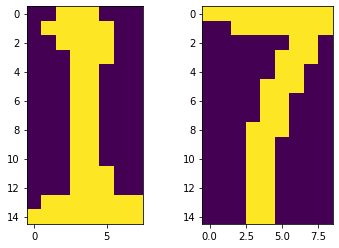

17


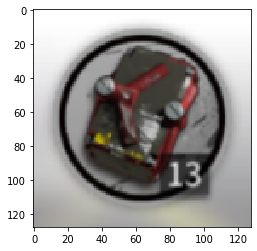

0.9830265641212463 34 Po_Sun_Zhuang_Zhi


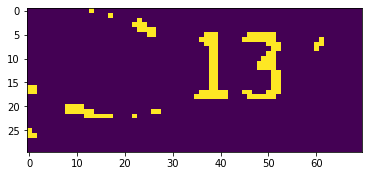

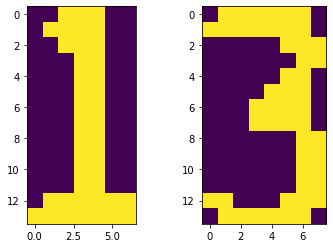

13


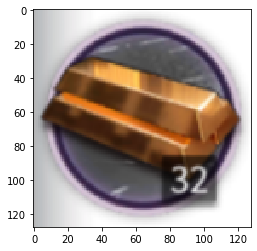

0.9996272325515747 2 Chi_Jin


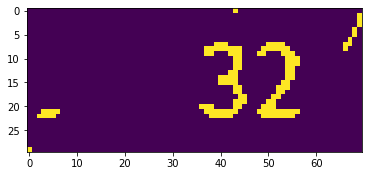

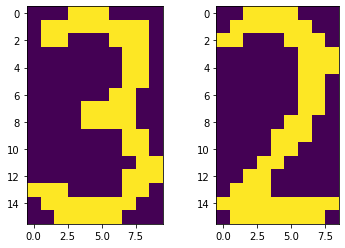

32


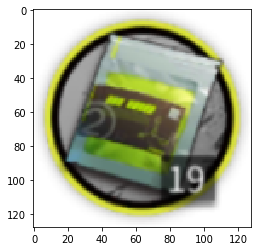

0.9978001713752747 29 Ju_Suan_Zhi


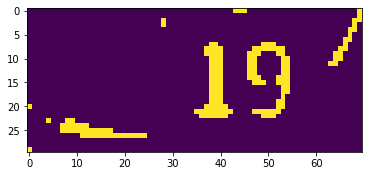

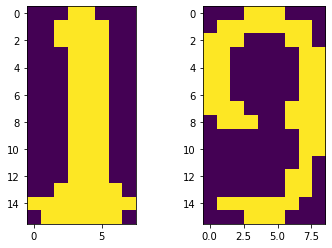

19


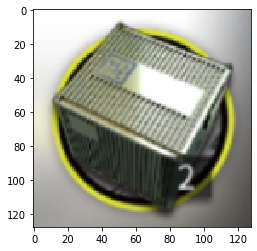

0.9998202919960022 20 Ji_Chu_Jia_Gu_Jian_Cai


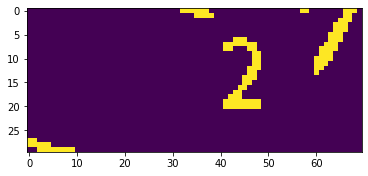

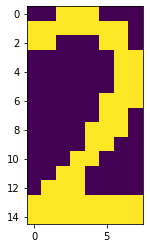

2


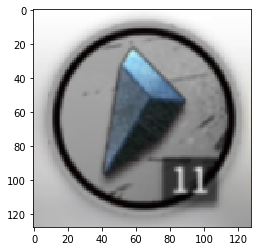

0.9997950196266174 71 Yi_Tie_Sui_Pian


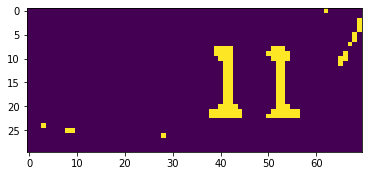

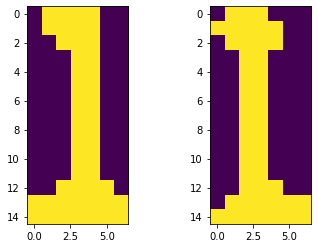

11


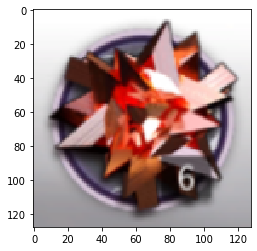

0.9995256662368774 38 RMA70-24


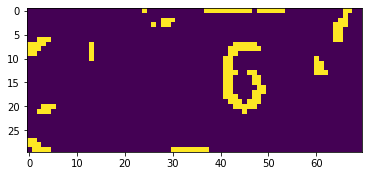

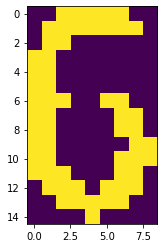

6


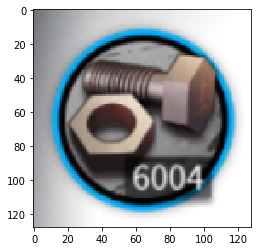

0.9999947547912598 82 Not_Support


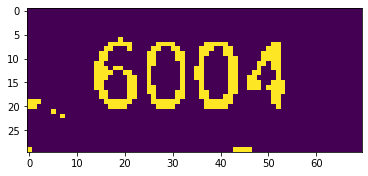

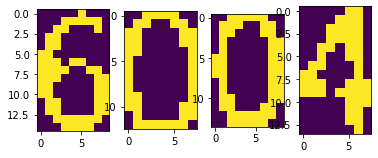

6004


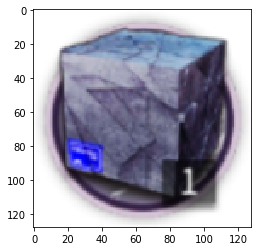

0.9999525547027588 39 San_Shui_Meng_Kuang


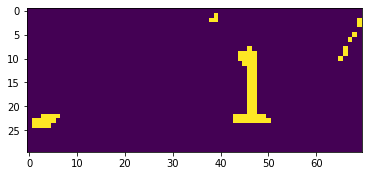

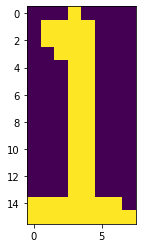

1


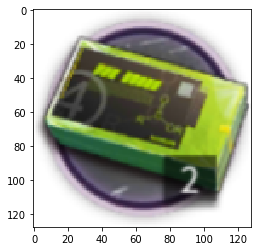

0.9977846741676331 30 Ju_Suan_Zhi_Kuai


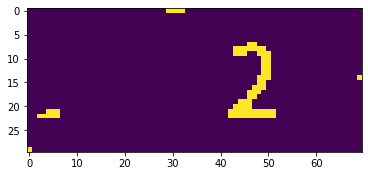

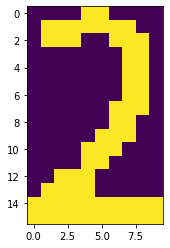

2


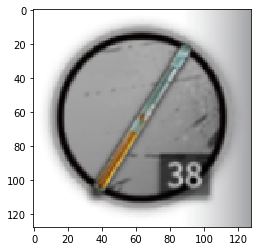

0.9951149225234985 42 Shuang_Tong


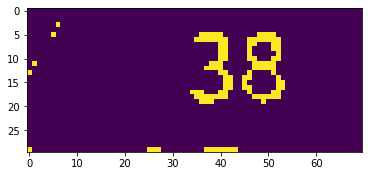

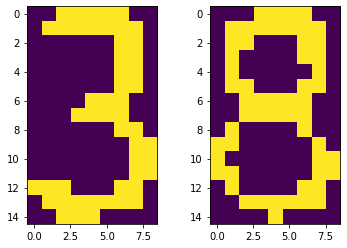

38


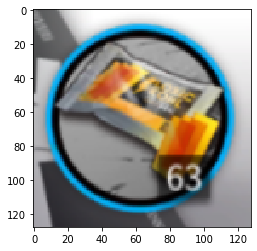

0.9967396855354309 33 Niu_Zhuan_Chun


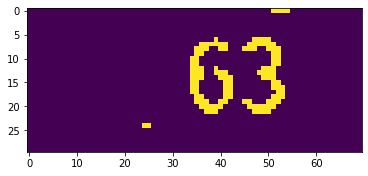

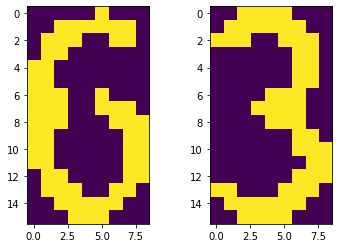

63


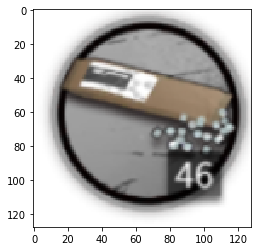

0.999828577041626 5 Dai_Tang


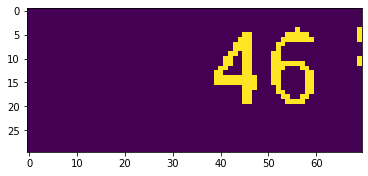

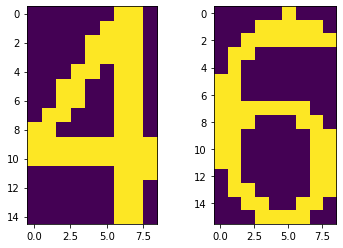

46


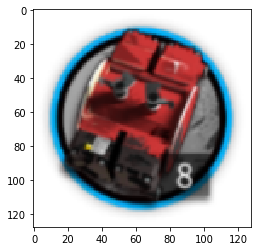

0.9777883887290955 36 Quan_Xin_Zhuang_Zhi


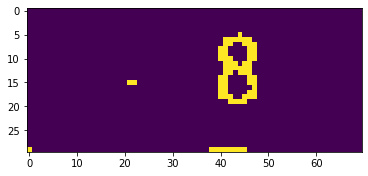

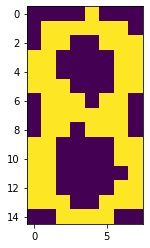

8


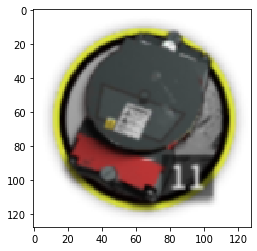

0.9030646085739136 80 Zhuang_Zhi


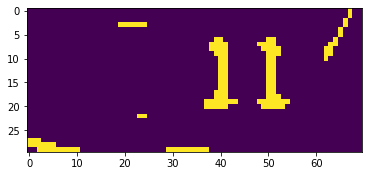

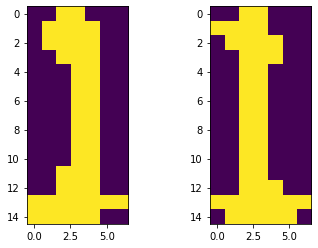

11


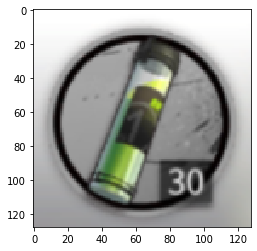

0.9993995428085327 75 Zhi_Yuan_Liao


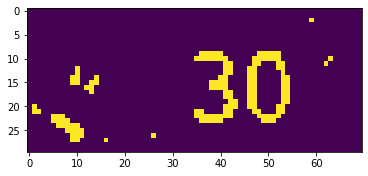

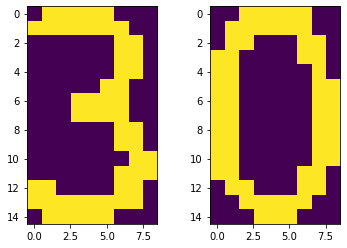

30


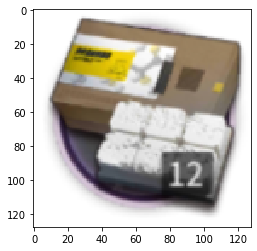

0.999991774559021 48 Tang_Ju_Kuai


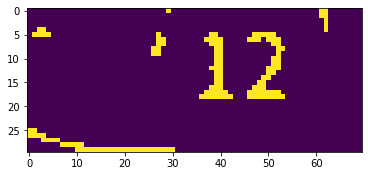

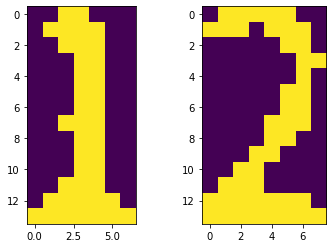

12
12.64018988609314


In [8]:
start = time.time()
inventory = {}
rois = []
roi_copies = []
for c in circles[0]:  # for every circle, predict the label
    box_size = int(c[2] * 2.4)
    x = int(c[0]-box_size//2)
    y = int(c[1]-box_size//2)
    if y < 0 or x < 0 or y+box_size >= scene.shape[0] or x+box_size >= scene.shape[1]:
        continue
    roi = scene[y:y+box_size, x:x+box_size, :]
    roi = cv2.resize(roi, (128, 128))
    roi_copy = roi.copy()
    roi_copies.append(roi_copy)
    roi = roi / 255 * 2 - 1
    roi = np.transpose(roi, (2, 0, 1))
    rois.append(roi)
rois = np.stack(rois, 0)
rois_t = torch.from_numpy(rois).float().cuda()
with torch.no_grad():    
    score = model(rois_t)
probs = nn.Softmax(1)(score)
predicts = score.argmax(1)
#print(predicts)
for i in range(len(rois)):
    #start = time.time()
    roi_copy = roi_copies[i]
    plt.imshow(roi_copy[..., ::-1])
    plt.show()
    predict = predicts[i].item()
    print(probs[i, predict].item(), predict, idx2name[predict])
    number_area = roi_copy[85:115, 45:115, :]
    number_area_gray = cv2.cvtColor(number_area, cv2.COLOR_BGR2GRAY)
    ##################### thresholding white area ###################
    threshed = cv2.adaptiveThreshold(number_area_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 23, -45)
    #threshed = cv2.adaptiveThreshold(number_area_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, -25)
    plt.imshow(threshed)
    plt.show()
    #print(time.time() - start)
    ##################### connected component #######################
    contours, _ = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #print(time.time() - start)
    valid_box = []
    for ct in contours:
        if cv2.contourArea(ct)>10:
            x, y, w, h = cv2.boundingRect(ct)
            ############### check h/w ratio, height, and whether centered vertically ##################
            if 10/45 < w/h  and w/h < 35 / 45 and 12<h and h<18 and abs(y+h//2 - 15) < 5:
                #plt.imshow(threshed[y:y+h, x:x+w])
                #plt.show()
                valid_box.append((x, y, w, h))
    #print(time.time() - start)
    valid_box = sorted(valid_box, key=lambda x:x[0])
    valid_box_2 = []
    num_digits = 1
    for box in valid_box:
        x, y, w, h = box
        #print(x, y, w, h)
        ################## numbers should have similar margin ################
        if len(valid_box_2)==0 or (abs(x - valid_box_2[-1][0]) > 7 and abs(x - valid_box_2[-1][0]) < 15):
            valid_box_2.append(box)
    for j, box in enumerate(valid_box_2):
        x, y, w, h = box
        plt.subplot(1, len(valid_box_2), j+1)
        plt.imshow(threshed[y:y+h, x:x+w])
    plt.show()
    number = 0
    #print(time.time() - start)
    ################# combine the numbers and send to OCR engine ###################### (sending each single digit to OCR is also OK)
    digit_images = []
    for box in valid_box_2:
        x, y, w, h = box
        digit_image = threshed[y:y+h, x:x+w]
        digit_image = np.pad(digit_image, ((3,3),(3,3)), mode='constant')
        digit_image = cv2.resize(digit_image, (int(28*digit_image.shape[1]/digit_image.shape[0]), 28))
        digit_images.append(digit_image)
#         digit_image = np.pad(digit_image, ((0, 0),((28 - digit_image.shape[1])//2, (28 - digit_image.shape[1] - (28 - digit_image.shape[1])//2))), 'constant')
#         plt.imshow(digit_image)
#         plt.show()
#         digit_image = (digit_image / 255 - 0.1307) / 0.3081
#         digit_image = np.reshape(digit_image, (1, 1, 28, 28))
#         digit = digit_model(torch.from_numpy(digit_image).float().cuda()).argmax(1)[0].item()
    number_image = np.concatenate(digit_images, 1)
#     plt.imshow(number_image)
#     plt.show()
    number = pytesseract.image_to_string(number_image, lang='eng', config='--psm 8 --oem 0 -c tessedit_char_whitelist=0123456789')
        #max_score = 0
        #digit = 0
        #for j in range(10):
        #    template = cv2.imread(f'd:/dev/ArkToolDemo/img/digits/{j}.png', cv2.IMREAD_GRAYSCALE)
        #    template = cv2.resize(template, (int(digit_image.shape[0] * template.shape[1] / template.shape[0]), digit_image.shape[0]))
        #    template = ((template < 127) * 255).astype(np.uint8)
        #    max_width = max(template.shape[1], digit_image.shape[1])
        #    template = np.pad(template, ((0, 0),((max_width - template.shape[1])//2, (max_width - template.shape[1] - (max_width - template.shape[1])//2))), 'constant')
        #    digit_image = np.pad(digit_image, ((0, 0),((max_width - digit_image.shape[1])//2, (max_width - digit_image.shape[1] - (max_width - digit_image.shape[1])//2))), 'constant')
        #    #plt.subplot(1,2,1)
        #    #plt.imshow(template)
        #    #plt.subplot(1,2,2)
        #    #plt.imshow(digit_image)
        #    #plt.show()
        #    intersection = np.sum((template * digit_image) > 0)
        #    union = np.sum((template + digit_image) > 0)
        #    print(intersection, union, intersection/union)
        #    if intersection/union > max_score:
        #        max_score = intersection/union
        #        digit = j
#         number = number * 10 + int(digit) if digit!='' else 0
    print(number)
    inventory[idx2name[predict]] = number
print(time.time() - start)

In [9]:
inventory

{'Tang_Zu': '1',
 'Yan_Mo_Shi': '72',
 'Yi_Tie': '24',
 'Yuan_Yan': '36',
 'RMA70-12': '3',
 'Gu_Yuan_Yan': '5',
 'Tong_Ning_Ji': '32',
 'Tang': '17',
 'Po_Sun_Zhuang_Zhi': '13',
 'Chi_Jin': '32',
 'Ju_Suan_Zhi': '19',
 'Ji_Chu_Jia_Gu_Jian_Cai': '2',
 'Yi_Tie_Sui_Pian': '11',
 'RMA70-24': '6',
 'Not_Support': '6004',
 'San_Shui_Meng_Kuang': '1',
 'Ju_Suan_Zhi_Kuai': '2',
 'Shuang_Tong': '38',
 'Niu_Zhuan_Chun': '63',
 'Dai_Tang': '46',
 'Quan_Xin_Zhuang_Zhi': '8',
 'Zhuang_Zhi': '11',
 'Zhi_Yuan_Liao': '30',
 'Tang_Ju_Kuai': '12'}